#IMPORTACION DE HERRAMIENTAS A USAR

In [175]:
import pandas as pd #importamos pandas para los dataframes
import numpy  as np # pa los calculos numéricos
import matplotlib.pyplot as plt #pa los graficos
import seaborn as sns #pa los graficos

#LECTURA DE ARCHIVO A USAR

In [176]:
pd.read_csv("encuestas_1000_casos.csv") #leemos el csv
df=pd.read_csv("encuestas_1000_casos.csv") #lo designamos a una dataframe

#CHEQUEO NULOS Y DATA GRAL

In [177]:
print(df.isnull().sum()) #vemos cuantos nulos hay
print(df.columns.tolist()) #vemos las columnas como una lista
print(df.info()) #info general del df

Fecha                                   0
Encuesta                                0
Estrato                                 0
Sexo                                    0
Edad                                   48
Nivel Educativo                        21
Cantidad de Integrantes en el Hogar     0
Imagen del Candidato                    8
Voto                                   30
Voto Anterior                           0
dtype: int64
['Fecha', 'Encuesta', 'Estrato', 'Sexo', 'Edad', 'Nivel Educativo', 'Cantidad de Integrantes en el Hogar', 'Imagen del Candidato', 'Voto', 'Voto Anterior']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Fecha                                1000 non-null   object 
 1   Encuesta                             1000 non-null   int64  
 2   Estrato                             

#NORMALIZACION DE DATOS

In [178]:
[col for col in df.columns if "fecha" in col.lower()] #buscamos columna fecha para ver nombre exacto
#como la fecha va a ser lo que indexemos la unificamos antes que nada
df.columns = df.columns.str.lower().str.replace(" ","_") #normalizamos nombres columnas
df = df.drop_duplicates() #eliminamos filas duplicadas
print(df.columns.tolist()) #printeamos los cambios de nombres de las columnas

['fecha', 'encuesta', 'estrato', 'sexo', 'edad', 'nivel_educativo', 'cantidad_de_integrantes_en_el_hogar', 'imagen_del_candidato', 'voto', 'voto_anterior']


In [179]:
print(df.isnull().sum())  # vemos que no hay nulos
print(df.info()) # mostramos informacion del dataframe luego de la limpieza
print(df.describe())# mostramos estadisticas descriptivas del dataframe


fecha                                   0
encuesta                                0
estrato                                 0
sexo                                    0
edad                                   47
nivel_educativo                        21
cantidad_de_integrantes_en_el_hogar     0
imagen_del_candidato                    8
voto                                   30
voto_anterior                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 0 to 997
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   fecha                                841 non-null    object 
 1   encuesta                             841 non-null    int64  
 2   estrato                              841 non-null    object 
 3   sexo                                 841 non-null    object 
 4   edad                                 794 non-null    float64
 5   

In [180]:
#como la fecha dice objets significa que la columna es string y no sirve para rolling por tiempo entonces:
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce') # convertimos la columna 'fecha' a tipo datetime
df = df.dropna(subset=['fecha']) #eliminamos filas donde 'fecha' no se pudo convertir  a datetime
#podemos llenar con la media o la moda en vez de eliminar nulos, pero en este caso no hay nulos en fecha, pero si puede ser en otras columnas para el analisis posterior
print(df.columns.tolist())
print(df["fecha"].dtype) #confirmamos que la fecha sea el formato correcto para poder aplicar rolling window

['fecha', 'encuesta', 'estrato', 'sexo', 'edad', 'nivel_educativo', 'cantidad_de_integrantes_en_el_hogar', 'imagen_del_candidato', 'voto', 'voto_anterior']
datetime64[ns]


In [181]:
df["edad"] = df["edad"].astype("Int64")  # convertimos edad que era float a entero
print(df["edad"].dtype) #confirmamos que edad es int 

Int64


#IMAGEN DEL CANDIDATO A LO LARGO DEL TIEMPO
#La idea ahora es hacer un rolling window que pueda ir uno viendo los valores de imagen del candidato a lo largo del tiempo e ir modificandola si queremos verla dentro de una semana o en 3 días o de un dia para el otro luego de algun evento importante.

In [182]:
df.set_index('fecha', inplace=True) #columna fecha como índice del df
df.sort_index(inplace=True) #ordenamos el df por el índice de fecha ya que es el "título" de cada fila
imagen_diaria = df["imagen_del_candidato"].resample("D").mean() #imagen x día
imagen_rolling = imagen_diaria.rolling("7D").mean()
print(imagen_rolling) #ahora si tenemos un dato por día, el promedio de todas las encuestas de ese día

# ahora podemos ver una fila por dia porque el rolling se aplica a un dato por dia que es la media diaria
# sirve en casos donde hay mas de una encuesta por dia

#OTRAS OPCIONES QUE VIMOS Y NO SIRVEN TAN BIEN
#1
#imagen_rolling = df["imagen_del_candidato"].rolling("7D").apply(np.mean)
#print(imagen_rolling)
#usamos un apply con una función matemática (np.mean), la media, aplicado para un rwindow de 7 días
#esto nos da un promedio móvil de la imagen del candidato en una ventana de 7 días
#cada fila del resultado es el promedio de la imagen del candidato en los 7 días anteriores (incluyendo el día actual)
#como el df tiene varias encuestas x día el rolling se aplica fila por fila, no por día
# cada fila es = al resultado del rolling “centrado” en esa encuesta
# entonces mejor agrupar por día ANTES del rolling para poder ver evolucion diaria y tambien en rolling window
#2
#imagen_rolling = df["imagen_del_candidato"].rolling(window=7, min_periods=1).mean()
#que haría un promedio móvil simple de 7 filas, no de 7 días

fecha
2025-01-15    68.812500
2025-01-16    68.812500
2025-01-17    68.812500
2025-01-18    68.812500
2025-01-19    68.812500
2025-01-20    68.812500
2025-01-21    68.812500
2025-01-22          NaN
2025-01-23          NaN
2025-01-24          NaN
2025-01-25          NaN
2025-01-26          NaN
2025-01-27          NaN
2025-01-28          NaN
2025-01-29          NaN
2025-01-30          NaN
2025-01-31          NaN
2025-02-01    79.619048
2025-02-02    79.619048
2025-02-03    79.619048
2025-02-04    79.619048
2025-02-05    79.619048
2025-02-06    79.619048
2025-02-07    79.619048
2025-02-08          NaN
2025-02-09          NaN
2025-02-10          NaN
2025-02-11          NaN
2025-02-12          NaN
2025-02-13          NaN
2025-02-14          NaN
2025-02-15    65.969388
2025-02-16    65.969388
2025-02-17    65.969388
2025-02-18    65.969388
2025-02-19    65.969388
2025-02-20    65.969388
2025-02-21    65.969388
2025-02-22          NaN
2025-02-23          NaN
2025-02-24          NaN
2025-02-25

#TEMA TRACKING INTENCION DE VOTO

Alternativa A

In [183]:

df["voto_num"] = df["voto"].map({
    "En blanco": 0,
    "Candidato A": 1,
    "Candidato B": 2,
    "Candidato C": 3,
    "No vota": 4 #preguntar como hacer esto con los casos con o sin tilde y blabla o ns/nc??? sino queda como float
}).fillna(0)  # evitamos los NaN - justamente consultar esto x lo anterior
#pasarlo a dummies es una opcion tambien para los votos, pero no se si conviene en este caso??
#reconocer que es un poco tramposo asignar 0 a los nulos, pero es para evitar que queden como float
#ademas no hay tantos nulos en voto como para que afecte mucho el analisis
#ver como reconocer los casos de ns/nc o con tilde o sin tilde en voto

print(df["voto_num"].dtype) #confirmamos que la nueva columna es numerica
df["voto_num"] = df["voto_num"].astype("Int64")  # convertimos a entero
df["voto_num"].head()

#el problema de este caso es que solo va a tomar los casos donde está exactamente asi escrito


float64


fecha
2025-01-15    2
2025-01-15    2
2025-01-15    2
2025-01-15    0
2025-01-15    1
Name: voto_num, dtype: Int64

Alternativa B
Groupby de conteo diario de casos por candidato

In [184]:
conteo = df.groupby(['fecha','voto']).size().unstack(fill_value=0) # conteo diario de casos x candidato
totales = conteo.sum(axis=1) # total casos x día
porcentaje_diario = conteo.div(totales,axis=0)*100 # porcentaje diario de votos por candidato (fórmula V_C,t / N_t * 100)
porcentaje_rolling = porcentaje_diario.rolling("7D").mean() # rolling window de 7 días que se puede ir modificando
print(porcentaje_rolling.head())
porcentaje_diario = porcentaje_diario.round(2)  #modificamos cantidad de decimales a 2
print(porcentaje_diario.astype(str)+"%") # mostramos porcentajes diarios con símbolo % de cada candidato

voto        Candidato A  Candidato B  Candidato C  En blanco    No vota
fecha                                                                  
2025-01-15    19.883041    26.315789    28.070175  21.637427   4.093567
2025-02-01    20.647773    11.336032    14.979757  34.008097  19.028340
2025-02-15    18.279570     4.301075    30.645161  15.053763  31.720430
2025-03-01    23.188406    19.323671    19.806763  22.705314  14.975845
voto       Candidato A Candidato B Candidato C En blanco No vota
fecha                                                           
2025-01-15      19.88%      26.32%      28.07%    21.64%   4.09%
2025-02-01      20.65%      11.34%      14.98%    34.01%  19.03%
2025-02-15      18.28%        4.3%      30.65%    15.05%  31.72%
2025-03-01      23.19%      19.32%      19.81%    22.71%  14.98%


Alternativa B

In [185]:
conteo_diario = df.groupby(["fecha","voto"]).size().unstack(fill_value=0)
print(conteo_diario.head())
cant_candA = df["voto"].str.contains("candidato a", case=False, na=False).sum()
print("Candidato A:", cant_candA)
cant_candB = df["voto"].str.contains("candidato b", case=False, na=False).sum()
print("Candidato B:", cant_candB)
cant_candC = df["voto"].str.contains("candidato c", case=False, na=False).sum()
print("Candidato C:", cant_candC)
cant_blanco = df["voto"].str.contains("blanco", case=False, na=False).sum()
print("En blanco:", cant_blanco)
cant_no_vota = df["voto"].str.contains("vota", case=False, na=False).sum()
print("No vota (todas las variantes):", cant_no_vota)
cant_ns_nc = df["voto"].str.contains("ns|nc", case=False, na=False).sum()
print("NS/NC:", cant_ns_nc)
total_casos = len(df)
print("Total casos:", total_casos)
total_diario = df.groupby(["fecha", "voto"]).size().unstack(fill_value=0)
print(total_diario.head())
porcentaje_diario = total_diario.div(totales, axis=0)*100
print(porcentaje_diario.head())
imagen_rolling= df["imagen_del_candidato"].rolling("7D").apply(np.mean)
print(imagen_rolling)

voto        Candidato A  Candidato B  Candidato C  En blanco  No vota
fecha                                                                
2025-01-15           34           45           48         37        7
2025-02-01           51           28           37         84       47
2025-02-15           34            8           57         28       59
2025-03-01           48           40           41         47       31
Candidato A: 167
Candidato B: 121
Candidato C: 183
En blanco: 196
No vota (todas las variantes): 144
NS/NC: 196
Total casos: 841
voto        Candidato A  Candidato B  Candidato C  En blanco  No vota
fecha                                                                
2025-01-15           34           45           48         37        7
2025-02-01           51           28           37         84       47
2025-02-15           34            8           57         28       59
2025-03-01           48           40           41         47       31
voto        Candidato A  Candid

In [186]:
imagen_rolling = df["imagen_del_candidato"].rolling("7D").apply(np.mean)
print(imagen_rolling)
#usamos un apply con una función matemática (np.mean), la media, aplicado para un rwindow de 7 días
#esto nos da un promedio móvil de la imagen del candidato en una ventana de 7 días
#cada fila del resultado es el promedio de la imagen del candidato en los 7 días anteriores (incluyendo el día actual)
#esto es útil para suavizar las fluctuaciones diarias y ver tendencias a más largo plazo 

#no confundir con
# imagen_rolling = df["imagen_del_candidato"].rolling(window=7, min_periods=1).mean()
# que haría un promedio móvil simple de 7 filas, no de 7 días

fecha
2025-01-15    56.000000
2025-01-15    78.000000
2025-01-15    69.666667
2025-01-15    66.500000
2025-01-15    66.600000
                ...    
2025-03-01    76.346341
2025-03-01    76.417476
2025-03-01    76.487923
2025-03-01    76.427885
2025-03-01    76.358852
Name: imagen_del_candidato, Length: 841, dtype: float64


In [187]:
df["voto_limpio"] = np.select(
    [
        df["voto"].str.contains("candidato a", case=False, na=False),
        df["voto"].str.contains("candidato b", case=False, na=False),
        df["voto"].str.contains("candidato c", case=False, na=False),
        df["voto"].str.contains("blanco", case=False, na=False),
        df["voto"].str.contains("vota",   case=False, na=False),
    ],
    [
        "Candidato A",
        "Candidato B",
        "Candidato C",
        "En blanco",
        "No vota",
    ],
    default="Otro"
)
print(df["voto_limpio"])

conteo2 = df.groupby(['fecha','voto_limpio']).size().unstack(fill_value=0) # conteo diario de casos x candidato
totales = conteo2.sum(axis=1) # total casos x día
porcentaje_diario2 = conteo2.div(totales,axis=0)*100 # porcentaje diario de votos por candidato (fórmula V_C,t / N_t * 100)
porcentaje_rolling2 = porcentaje_diario2.rolling("7D").mean() # rolling window de 7 días que se puede ir modificando
print(porcentaje_rolling2.head())
porcentaje_diario2 = porcentaje_diario2.round(2)  #modificamos cantidad de decimales a 2
print(porcentaje_diario2.astype(str)+"%") # mostramos porcentajes diarios con símbolo % de cada candidato

fecha
2025-01-15    Candidato B
2025-01-15    Candidato B
2025-01-15    Candidato B
2025-01-15      En blanco
2025-01-15    Candidato A
                 ...     
2025-03-01    Candidato C
2025-03-01    Candidato C
2025-03-01    Candidato C
2025-03-01        No vota
2025-03-01        No vota
Name: voto_limpio, Length: 841, dtype: object
voto_limpio  Candidato A  Candidato B  Candidato C  En blanco    No vota  \
fecha                                                                      
2025-01-15     19.209040    25.423729    27.118644  20.903955   3.954802   
2025-02-01     20.158103    11.067194    14.624506  33.201581  18.577075   
2025-02-15     17.085427     4.020101    28.643216  14.070352  29.648241   
2025-03-01     22.641509    18.867925    19.339623  22.169811  14.622642   

voto_limpio      Otro  
fecha                  
2025-01-15   3.389831  
2025-02-01   2.371542  
2025-02-15   6.532663  
2025-03-01   2.358491  
voto_limpio Candidato A Candidato B Candidato C En blanco No 

#GRAFICOS DE AMBOS TRACKING

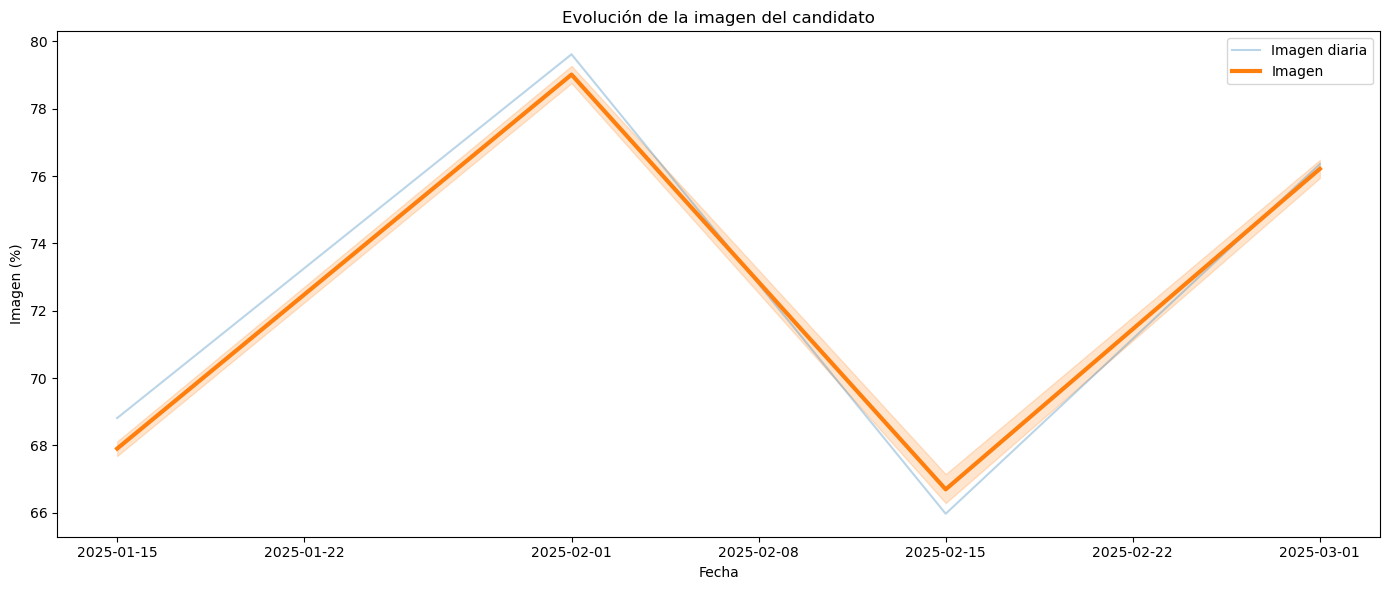

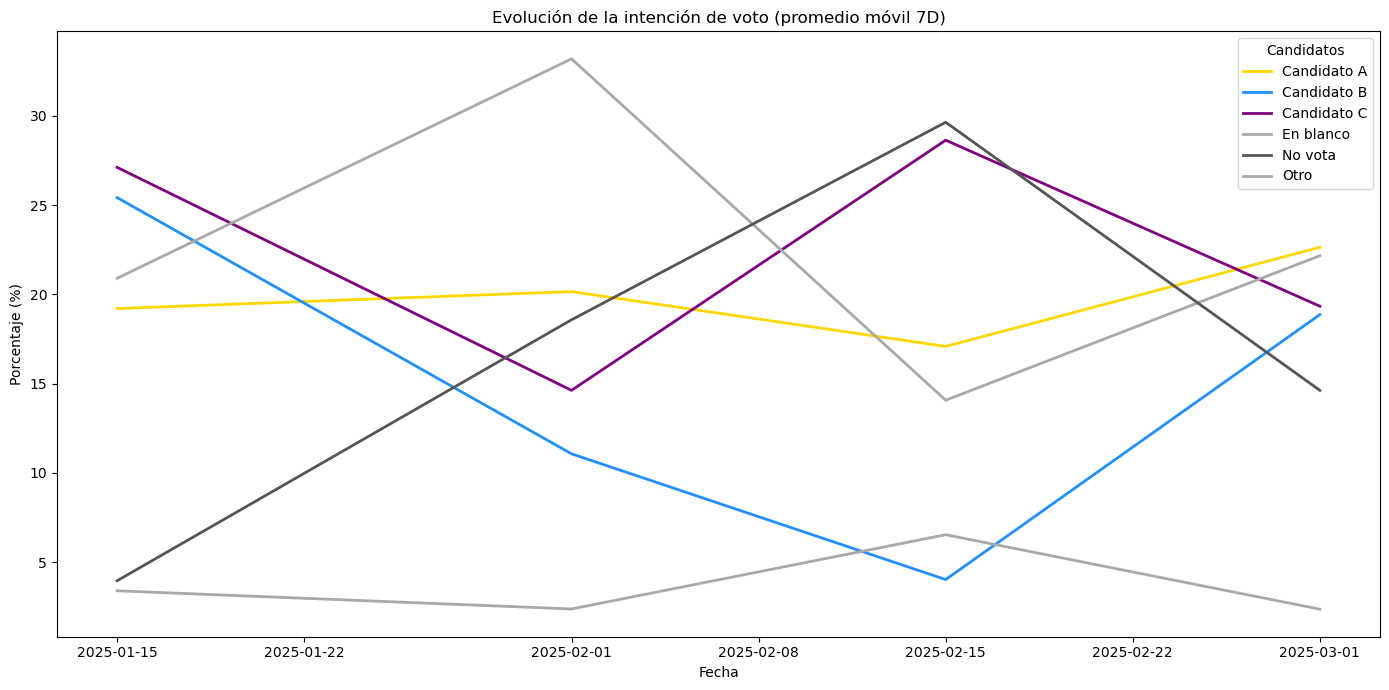

In [188]:
colores = {
    "Candidato A": "#FFD700",   # amarillo
    "Candidato B": "#1E90FF",   # celeste oscuro
    "Candidato C": "#800080",   # violeta
    "No vota":     "#555555",   # gris oscuro
    "En blanco":   "#A9A9A9",   # gris claro
    "Otro":        "#A9A9A9"    # para NS/NC o categorías residuales
}

#GRÁFICO DE LÍNEAS DE EVOLUCIÓN DE LA IMAGEN DEL CANDIDATO
plt.figure(figsize=(14, 6)) #definimos tamaño del grafico final
sns.lineplot( #linea 1
x=imagen_diaria.index, # x = fechas (el índice de la serie)
y=imagen_diaria, #y = valores diarios de imagen
label="Imagen diaria",
alpha=0.3 # transparencia de la línea
)
sns.lineplot( #linea 2
x=imagen_rolling.index,
y=imagen_rolling,
label="Imagen", #nombre de la linea
linewidth=3 #grosor línea
)
plt.title("Evolución de la imagen del candidato")
plt.xlabel("Fecha")
plt.ylabel("Imagen (%)")
plt.legend() # se muestra la "leyenda" para diferenciar líneas
plt.tight_layout() #ajuste layout para que nada quede fuera de frame
plt.show()

# Tomamos el df porcentaje_rolling2 formato "wide" lo convertimos a formato "long"
#que es el que necesita Seaborn para graficar múltiples líneas (1xcategoría)  (DONDE ESTA ESTO HECHO)

df_plot = porcentaje_rolling2.reset_index().melt(
id_vars="fecha", #columna fija, eje X del gráfico (las fechas, que varían)
var_name="categoria", # nombre de la variable/columna de las categorías
value_name="porcentaje" # nombre columna numerica, en este caso el rwolling de %
)

# GRÁFICO DE LÍNEAS DE EVOLUCIÓN DE LA INTENCIÓN DE VOTO
plt.figure(figsize=(14, 7)) # definimos tamaño del grafico final
sns.lineplot(
    data=df_plot, # el df en formato long que preparamos con melt()
    x="fecha", #eje horizontal
    y="porcentaje", #eje vertical
    hue="categoria", # c/categoria de voto es cada linea
    linewidth=2,# grosor lineas
   palette=colores  #colores definidos arriba
)
plt.title("Evolución de la intención de voto (promedio móvil 7D)") #titulo
plt.xlabel("Fecha") #etiqueta eje x 
plt.ylabel("Porcentaje (%)") #etiqueta eje y
plt.legend(title="Candidatos") #leyenda en el grafico
plt.tight_layout() #evitamos cortes del grafico y nombres con ajuste automatico del layout
plt.show()
